In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:.2f}'.format

## Columns:
- userid - unique number of user
- version (gate30, gate40) - two versions of the tested game
- sum_gamerounds - the amount of rounds which userid played
- retention 1 - value contains if the user still plays in game in 1st week
- retention 7 - value contains if the user still plays in-game in 7st week

## Reading file

In [3]:
df = pd.read_csv("cookie_cats.csv")

In [4]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


## Searching unique users in dataset

In [6]:
df.userid.nunique()

90189

In [44]:
df.shape

(90189, 5)

In [8]:
df.info

<bound method DataFrame.info of         userid  version  sum_gamerounds  retention_1  retention_7
0          116  gate_30               3        False        False
1          337  gate_30              38         True        False
2          377  gate_40             165         True        False
3          483  gate_40               1        False        False
4          488  gate_40             179         True         True
...        ...      ...             ...          ...          ...
90184  9999441  gate_40              97         True        False
90185  9999479  gate_40              30        False        False
90186  9999710  gate_30              28         True        False
90187  9999768  gate_40              51         True        False
90188  9999861  gate_40              16        False        False

[90189 rows x 5 columns]>

## Check if null exists in the data and show description of table

In [10]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,90189.00,4998412.23,2883285.61,116.00,2512230.00,4995815.00,7496452.00,9999861.00
sum_gamerounds,90189.00,51.87,195.05,0.00,5.00,16.00,51.00,49854.00


## Found and cut emissions

{'whiskers': [<matplotlib.lines.Line2D at 0x13a852140>,
 'caps': [<matplotlib.lines.Line2D at 0x13a852680>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a851ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x13a852bc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13a852e60>],
 'means': []}

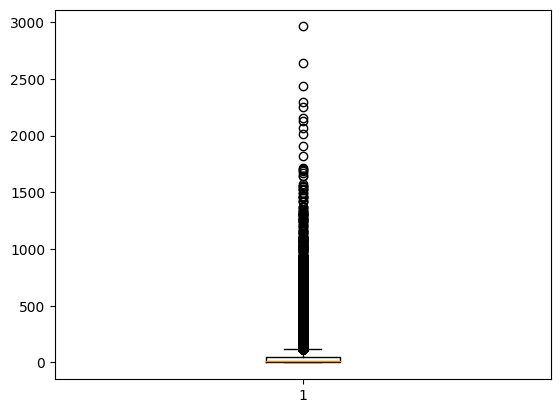

In [58]:
plt.boxplot(df[df.sum_gamerounds < 3000].sum_gamerounds)


## Check for duplicates in the data

In [21]:
df.duplicated().sum()

0

## Grouped by versions of the game and amount of userid 

In [20]:
df.groupby('version').agg({'userid': 'count'}).reset_index()

,version,userid
0,gate_30,44700
1,gate_40,45489


In [23]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Grouped by versions of the game and how many users joined the game on the 1st day and were retained on 7th day

In [47]:
result = df.groupby("version").agg({"retention_1": "sum", "retention_7": "sum"}).reset_index()
result

,version,retention_1,retention_7
0,gate_30,20034,8502
1,gate_40,20119,8279


## Grouped by versions of the game about total amounts of passed levels

In [48]:
df.groupby("version")["sum_gamerounds"].sum().reset_index()



,version,sum_gamerounds
0,gate_30,2344795
1,gate_40,2333530


## The mean value of the 1st day and the 7th day of retention

In [49]:
df.groupby("version")["retention_1"].mean().reset_index()


,version,retention_1
0,gate_30,0.45
1,gate_40,0.44


In [50]:
df.groupby("version")["retention_7"].mean().reset_index()



,version,retention_7
0,gate_30,0.19
1,gate_40,0.18


## Calculate how many people are left in the game on the 7th day

In [55]:
df.groupby('version').agg({'userid': 'count', 'retention_7': 'sum'}).reset_index()


,version,userid,retention_7
0,gate_30,44700,8502
1,gate_40,45489,8279


In [54]:
df_AB = df[df.retention_7 == True]

In [56]:
df_AB.groupby('version').agg({'userid': 'count'})

,userid
version,
gate_30,8502
gate_40,8279


## Conclusions
- <strong>Day 1 Retention (retention_1)</strong>: The game versions "gate_30" and "gate_40" have similar values for day 1 retention. This indicates that in both versions, approximately the same proportion of users return and play at least on the following day after starting the game.

- <strong>Day 7 Retention (retention_7)</strong>: The "gate_30" game version has slightly higher day 7 retention compared to the "gate_40" version. This might suggest that users of the "gate_30" version are more likely to stick around in the game for a longer period and return on the seventh day after starting the game.

- <strong>Importance of Long-Term Retention</strong>: High day 7 retention is a positive indicator, as it signifies that more users are staying in the game for an extended period. However, for a comprehensive understanding of the game's effectiveness, it's also important to consider other metrics such as conversion to purchases (if applicable) and overall user experience.

- <strong>Statistical Significance</strong>: The provided p-value of 0.0016 (approximately 0.16%) suggests a statistically significant difference between the two game versions in terms of day 7 retention. This indicates that the observed difference in day 7 retention is likely not due to random chance but has meaningful significance.

- <strong>Further Analysis</strong>: To comprehend why the "gate_30" version exhibits higher day 7 retention, it's worth conducting a more detailed analysis of differences between the game versions. There might be specific aspects (difficulty levels, interface, features, etc.) that make "gate_30" more appealing to users.

- <strong>Response to Changes</strong>: If you plan to make modifications to the game, such as altering difficulty levels or introducing new features, it's crucial to consider how these changes might impact retention and the overall user experience.